## Intensity Transformation

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [13]:
# Load the image
img = cv2.imread('fractured_spine.tif')
img_2 = cv2.imread('Formula1.jpeg')


## Log Transformation
 Log transformations can be expressed as s = clog(1+r). Here, s is the output intensity, r>=0 is the input intensity of the pixel, and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image.

<ipython-input-14-0c8001c38e7d>:4: RuntimeWarning: divide by zero encountered in log
  log_transform = c * np.log(1 + img_2)


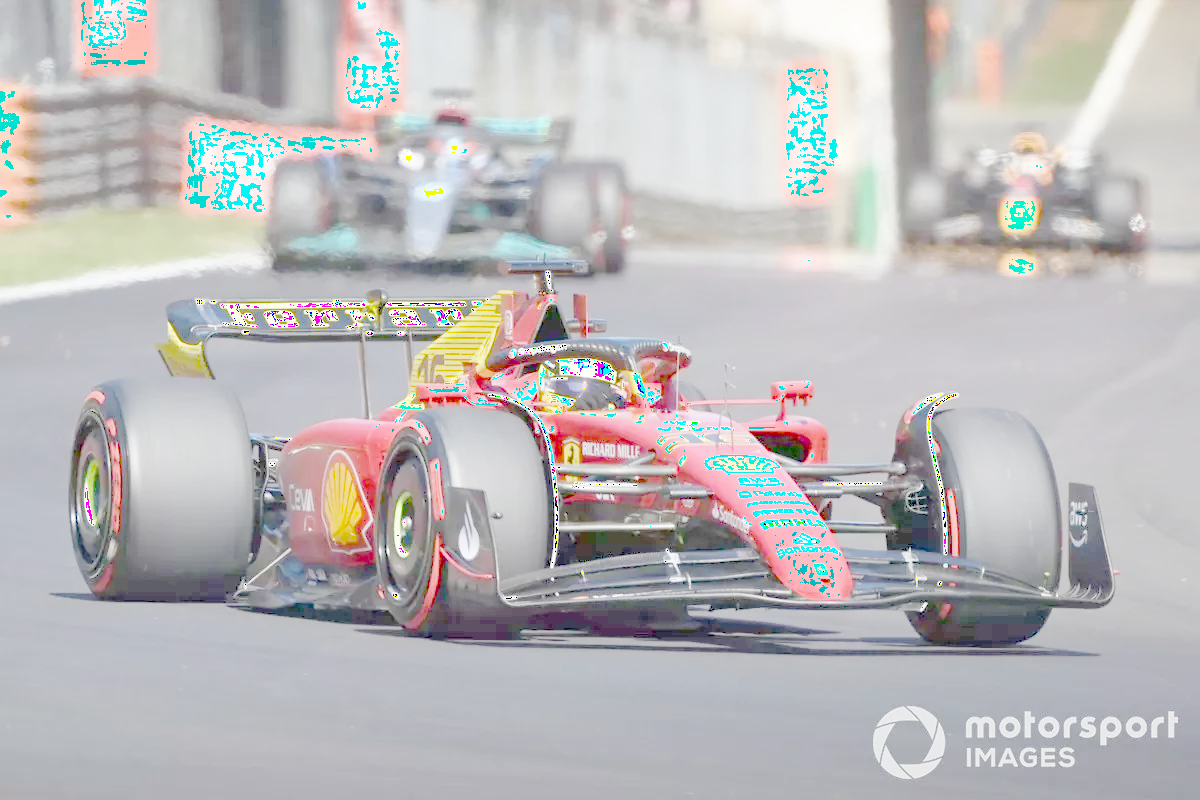

In [14]:
# Calculating constant
c = 255 / (np.log(1+np.max(img_2)))
# Calculating the log transform
log_transform = c * np.log(1 + img_2)

# Specify the data type.
log_transformed_image = np.array(log_transform, dtype = np.uint8)
# Result
cv2_imshow(log_transformed_image)

## Power Law (Gamma) Transformation
Power-law (gamma) transformations can be mathematically expressed as S = c*r^(gamma)


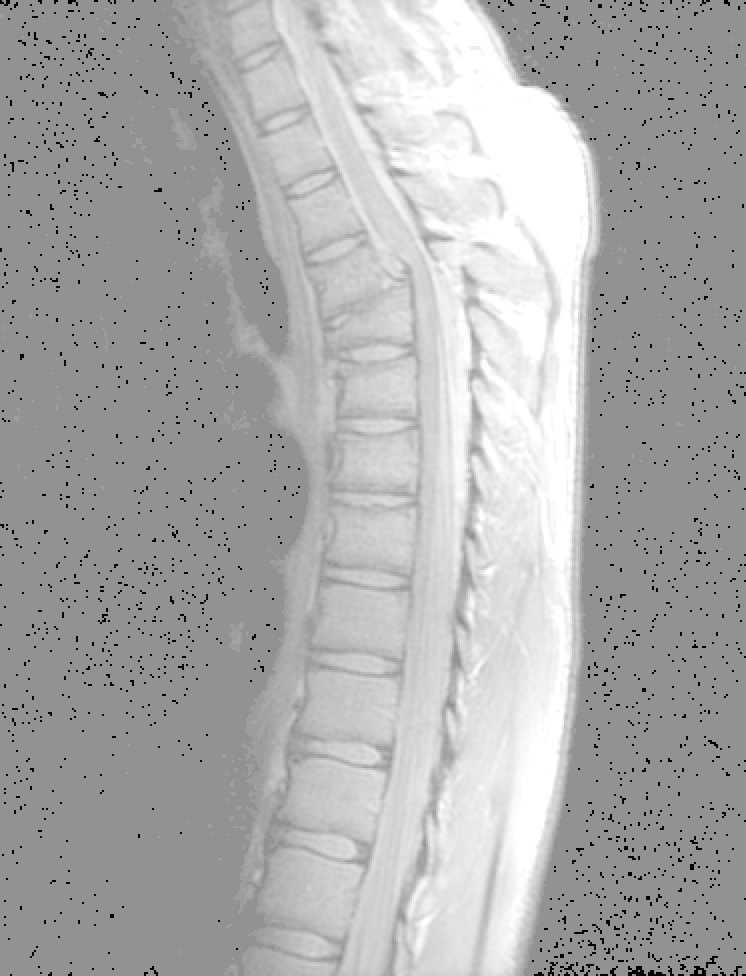

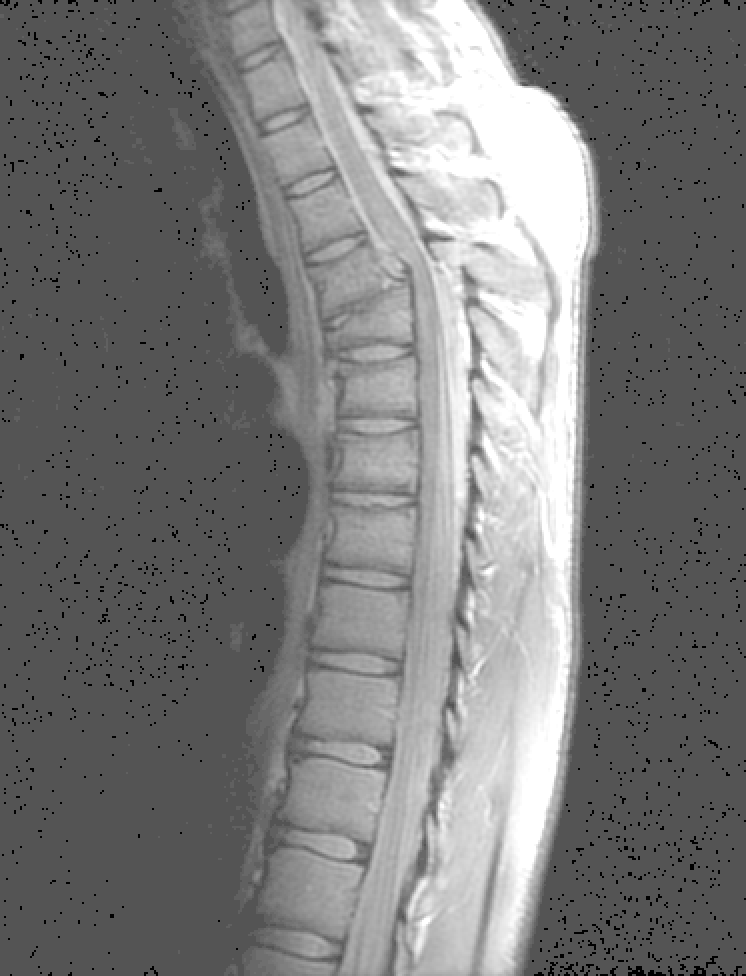

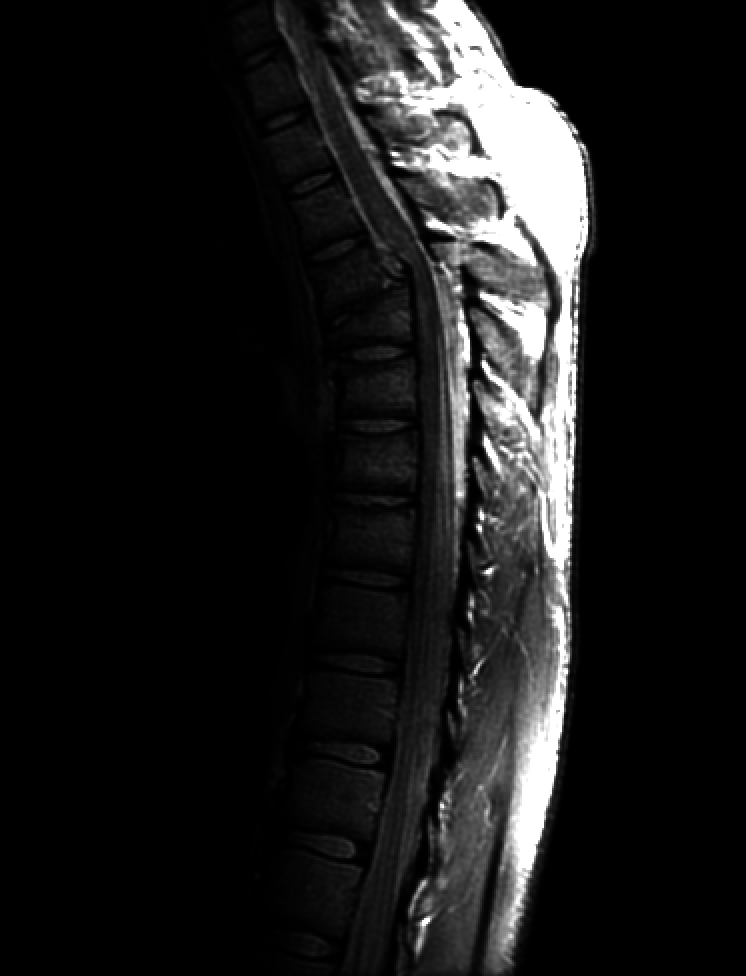

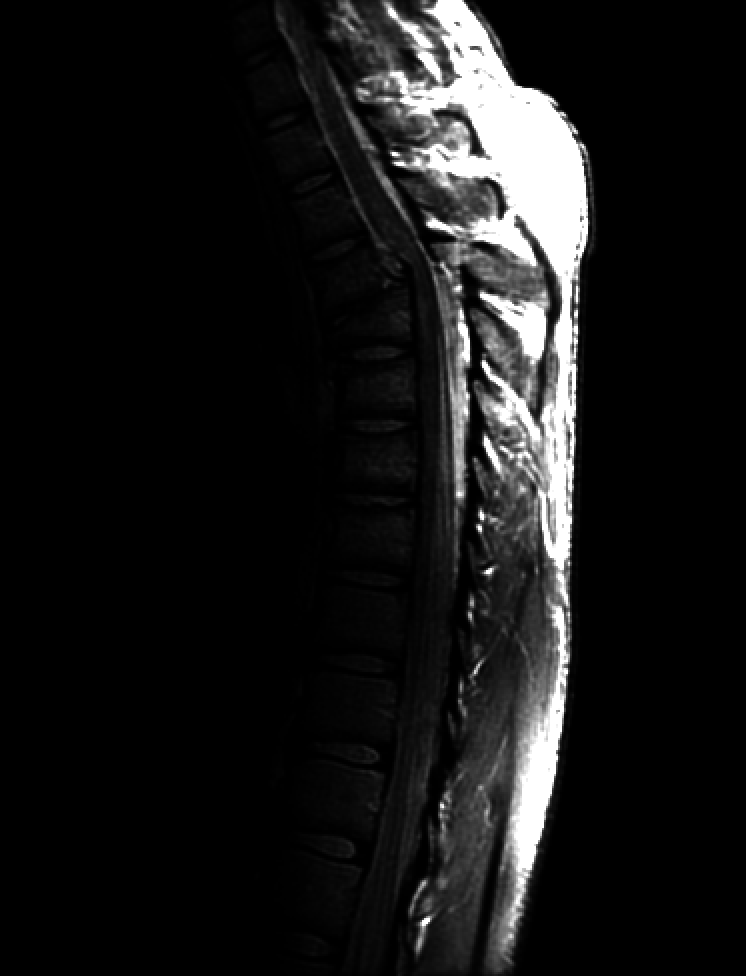

In [17]:
# Trying different values of gamma
gamma = [0.1, 0.2, 1.3, 1.6]
for g in gamma:
  # Calculating the new image
  gamma_corrected = np.array(255*(img / 255) ** g, dtype = 'uint8')
  # Displaying each image
  cv2_imshow(gamma_corrected)


## Piecewise Linear Transformation Function
These functions, as the name suggests, are not entirely linear in nature. However, they are linear between certain x-intervals. One of the most commonly used piecewise-linear transformation functions is contrast stretching.



In [21]:
def pixel_value(pix, r1, s1, r2, s2):
  if (0<=pix and pix<=r1):
    return (s1/r1)*pix
  elif r1<=pix and r1<=r2:
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2


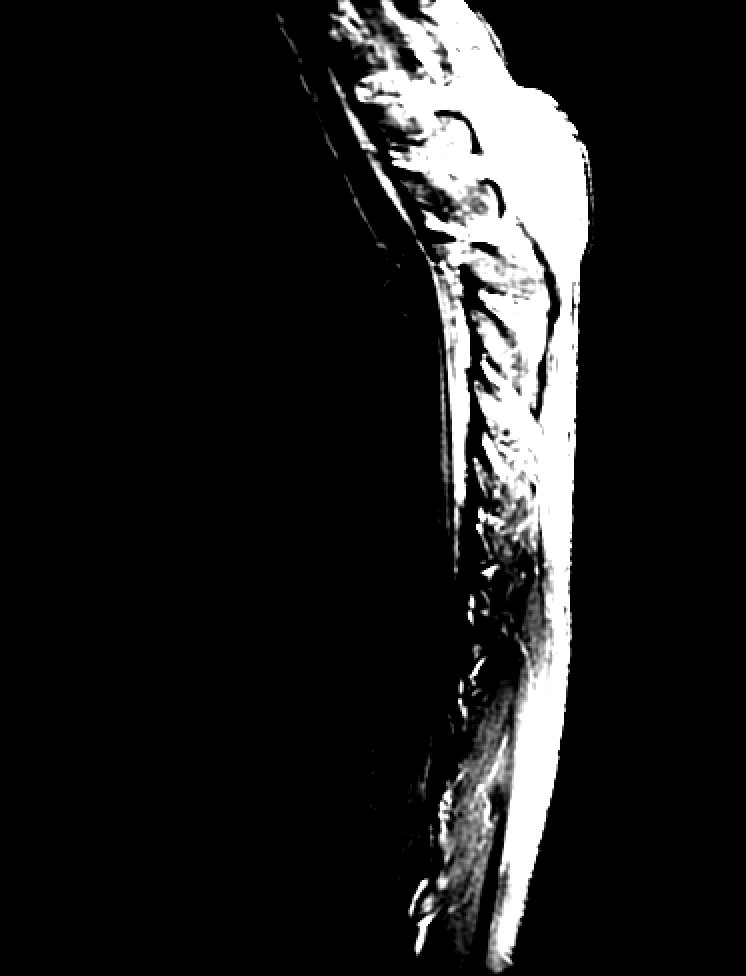

In [23]:
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixel_value)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)

# Result
cv2_imshow(contrast_stretched)
